In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from datetime import date, timedelta, datetime

In [2]:
data = pd.read_csv('Scooter Rental Dataset.csv')

In [3]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp           int64
humidity      float64
windspeed       int64
count         float64
dtype: object

In [4]:
data["datetime"] = pd.to_datetime(data["datetime"])

In [5]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,3.28,3,81.0,0,16.0
1,2011-01-01 01:00:00,1,0,0,1,2.34,2,80.0,0,40.0
2,2011-01-01 02:00:00,1,0,0,1,2.34,2,80.0,0,32.0
3,2011-01-01 03:00:00,1,0,0,1,3.28,3,75.0,0,13.0
4,2011-01-01 04:00:00,1,0,0,1,3.28,3,75.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
17350,2012-12-30 19:00:00,1,0,0,1,7.98,8,61.0,0,NaN
17351,2012-12-30 20:00:00,1,0,0,1,2.34,-3,47.0,22,NaN
17352,2012-12-30 21:00:00,1,0,0,1,1.40,-2,51.0,11,NaN
17353,2012-12-30 22:00:00,1,0,0,1,1.40,-3,55.0,13,NaN


In [6]:
#humidity has missing values
missing_data = data.isnull().sum() * 100 / len(data)
missing_data.sort_values(ascending=False)

count         0.956497
humidity      0.057620
datetime      0.000000
season        0.000000
holiday       0.000000
workingday    0.000000
weather       0.000000
temp          0.000000
atemp         0.000000
windspeed     0.000000
dtype: float64

In [7]:
#can replace NaNs with last 7 days average, but my lightgbm model can handle missing values natively 
#data["humidity"] =  data["humidity"].fillna(data["humidity"].mean())

<AxesSubplot:xlabel='datetime'>

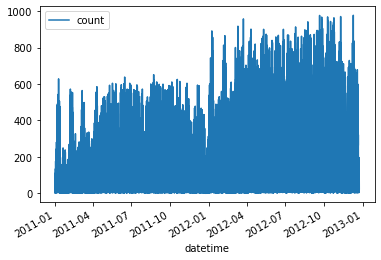

In [8]:
data.plot( 'datetime' , 'count' )

<AxesSubplot:>

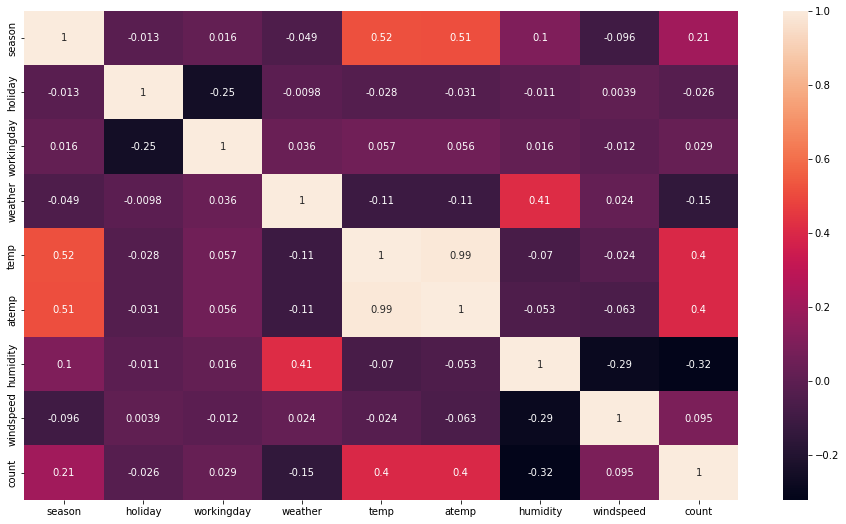

In [9]:
plt.figure(figsize=(16, 9))
sns.heatmap(data.corr(), annot=True)

In [10]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,17355.000000,17355.000000,17355.000000,17355.000000,17355.000000,17355.000000,17345.000000,17355.000000,17189.000000
mean,2.230251,0.028810,0.682282,1.430596,15.376671,15.424143,62.728913,12.739499,190.731049
std,1.072886,0.167277,0.465603,0.643186,9.042628,11.332205,19.306062,8.201624,181.843971
min,1.000000,0.000000,0.000000,1.000000,-7.060000,-16.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,7.980000,6.000000,48.000000,7.000000,41.000000
50%,2.000000,0.000000,1.000000,1.000000,15.500000,16.000000,63.000000,13.000000,144.000000
75%,3.000000,0.000000,1.000000,2.000000,23.020000,25.000000,78.000000,17.000000,282.000000
max,4.000000,1.000000,1.000000,4.000000,39.000000,50.000000,100.000000,57.000000,977.000000


In [11]:
#training_data = data[data["datetime"] < "2012-12-24"]

In [12]:
#construct time related features to signal the model better, this should help to capture seasonality
data["dayofweek"] = data["datetime"].dt.dayofweek
data["month"] = data["datetime"].dt.month
data["year"] = data["datetime"].dt.year
data["hourofday"]= data["datetime"].dt.hour

In [13]:
#data[data["datetime"] >=   "2012-12-24"]

In [14]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,dayofweek,month,year,hourofday
0,2011-01-01 00:00:00,1,0,0,1,3.28,3,81.0,0,16.0,5,1,2011,0
1,2011-01-01 01:00:00,1,0,0,1,2.34,2,80.0,0,40.0,5,1,2011,1
2,2011-01-01 02:00:00,1,0,0,1,2.34,2,80.0,0,32.0,5,1,2011,2
3,2011-01-01 03:00:00,1,0,0,1,3.28,3,75.0,0,13.0,5,1,2011,3
4,2011-01-01 04:00:00,1,0,0,1,3.28,3,75.0,0,1.0,5,1,2011,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17350,2012-12-30 19:00:00,1,0,0,1,7.98,8,61.0,0,NaN,6,12,2012,19
17351,2012-12-30 20:00:00,1,0,0,1,2.34,-3,47.0,22,NaN,6,12,2012,20
17352,2012-12-30 21:00:00,1,0,0,1,1.40,-2,51.0,11,NaN,6,12,2012,21
17353,2012-12-30 22:00:00,1,0,0,1,1.40,-3,55.0,13,NaN,6,12,2012,22


In [15]:
from darts import TimeSeries
from darts.models import RegressionModel
import lightgbm as lgb

In [16]:
#darts will do recurrsive one step predictions.
#so if we predict 3 steps ahead, the initial 1 step prediction
#the 2nd step prediction is then based on the previous 1 step prediction
#turning the time series problem into a tabular ML problem usually will outperform classic TS models like arima, prophet

In [17]:
y = TimeSeries.from_series(data["count"])


features = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'dayofweek', 'month',
       'year', 'hourofday']

In [18]:
future_cov = TimeSeries.from_series(data[features])

In [19]:
#hold last 3 weeks of data out for validation, the very last week will be our predictions

In [44]:
y_train = y[:-(166*3)]
y_test = y[-(166*3):]

In [45]:
model = RegressionModel(
                        model = lgb.LGBMRegressor(max_depth = 12),
                        lags = [-1,-2,-3,-4,-5,-6,-7],
                        lags_future_covariates =[0]
                        
)

In [46]:
#this model will use the last 7 days counts and current date covariates features to do prediction

In [47]:
model.fit(y_train, future_covariates = future_cov)

C:\Users\docto\anaconda3\lib\site-packages\darts\timeseries.py:4079: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  if isinstance(time_idx, pd.Int64Index) and not isinstance(


In [48]:
prediction = model.predict(n = len(y_test))

In [49]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

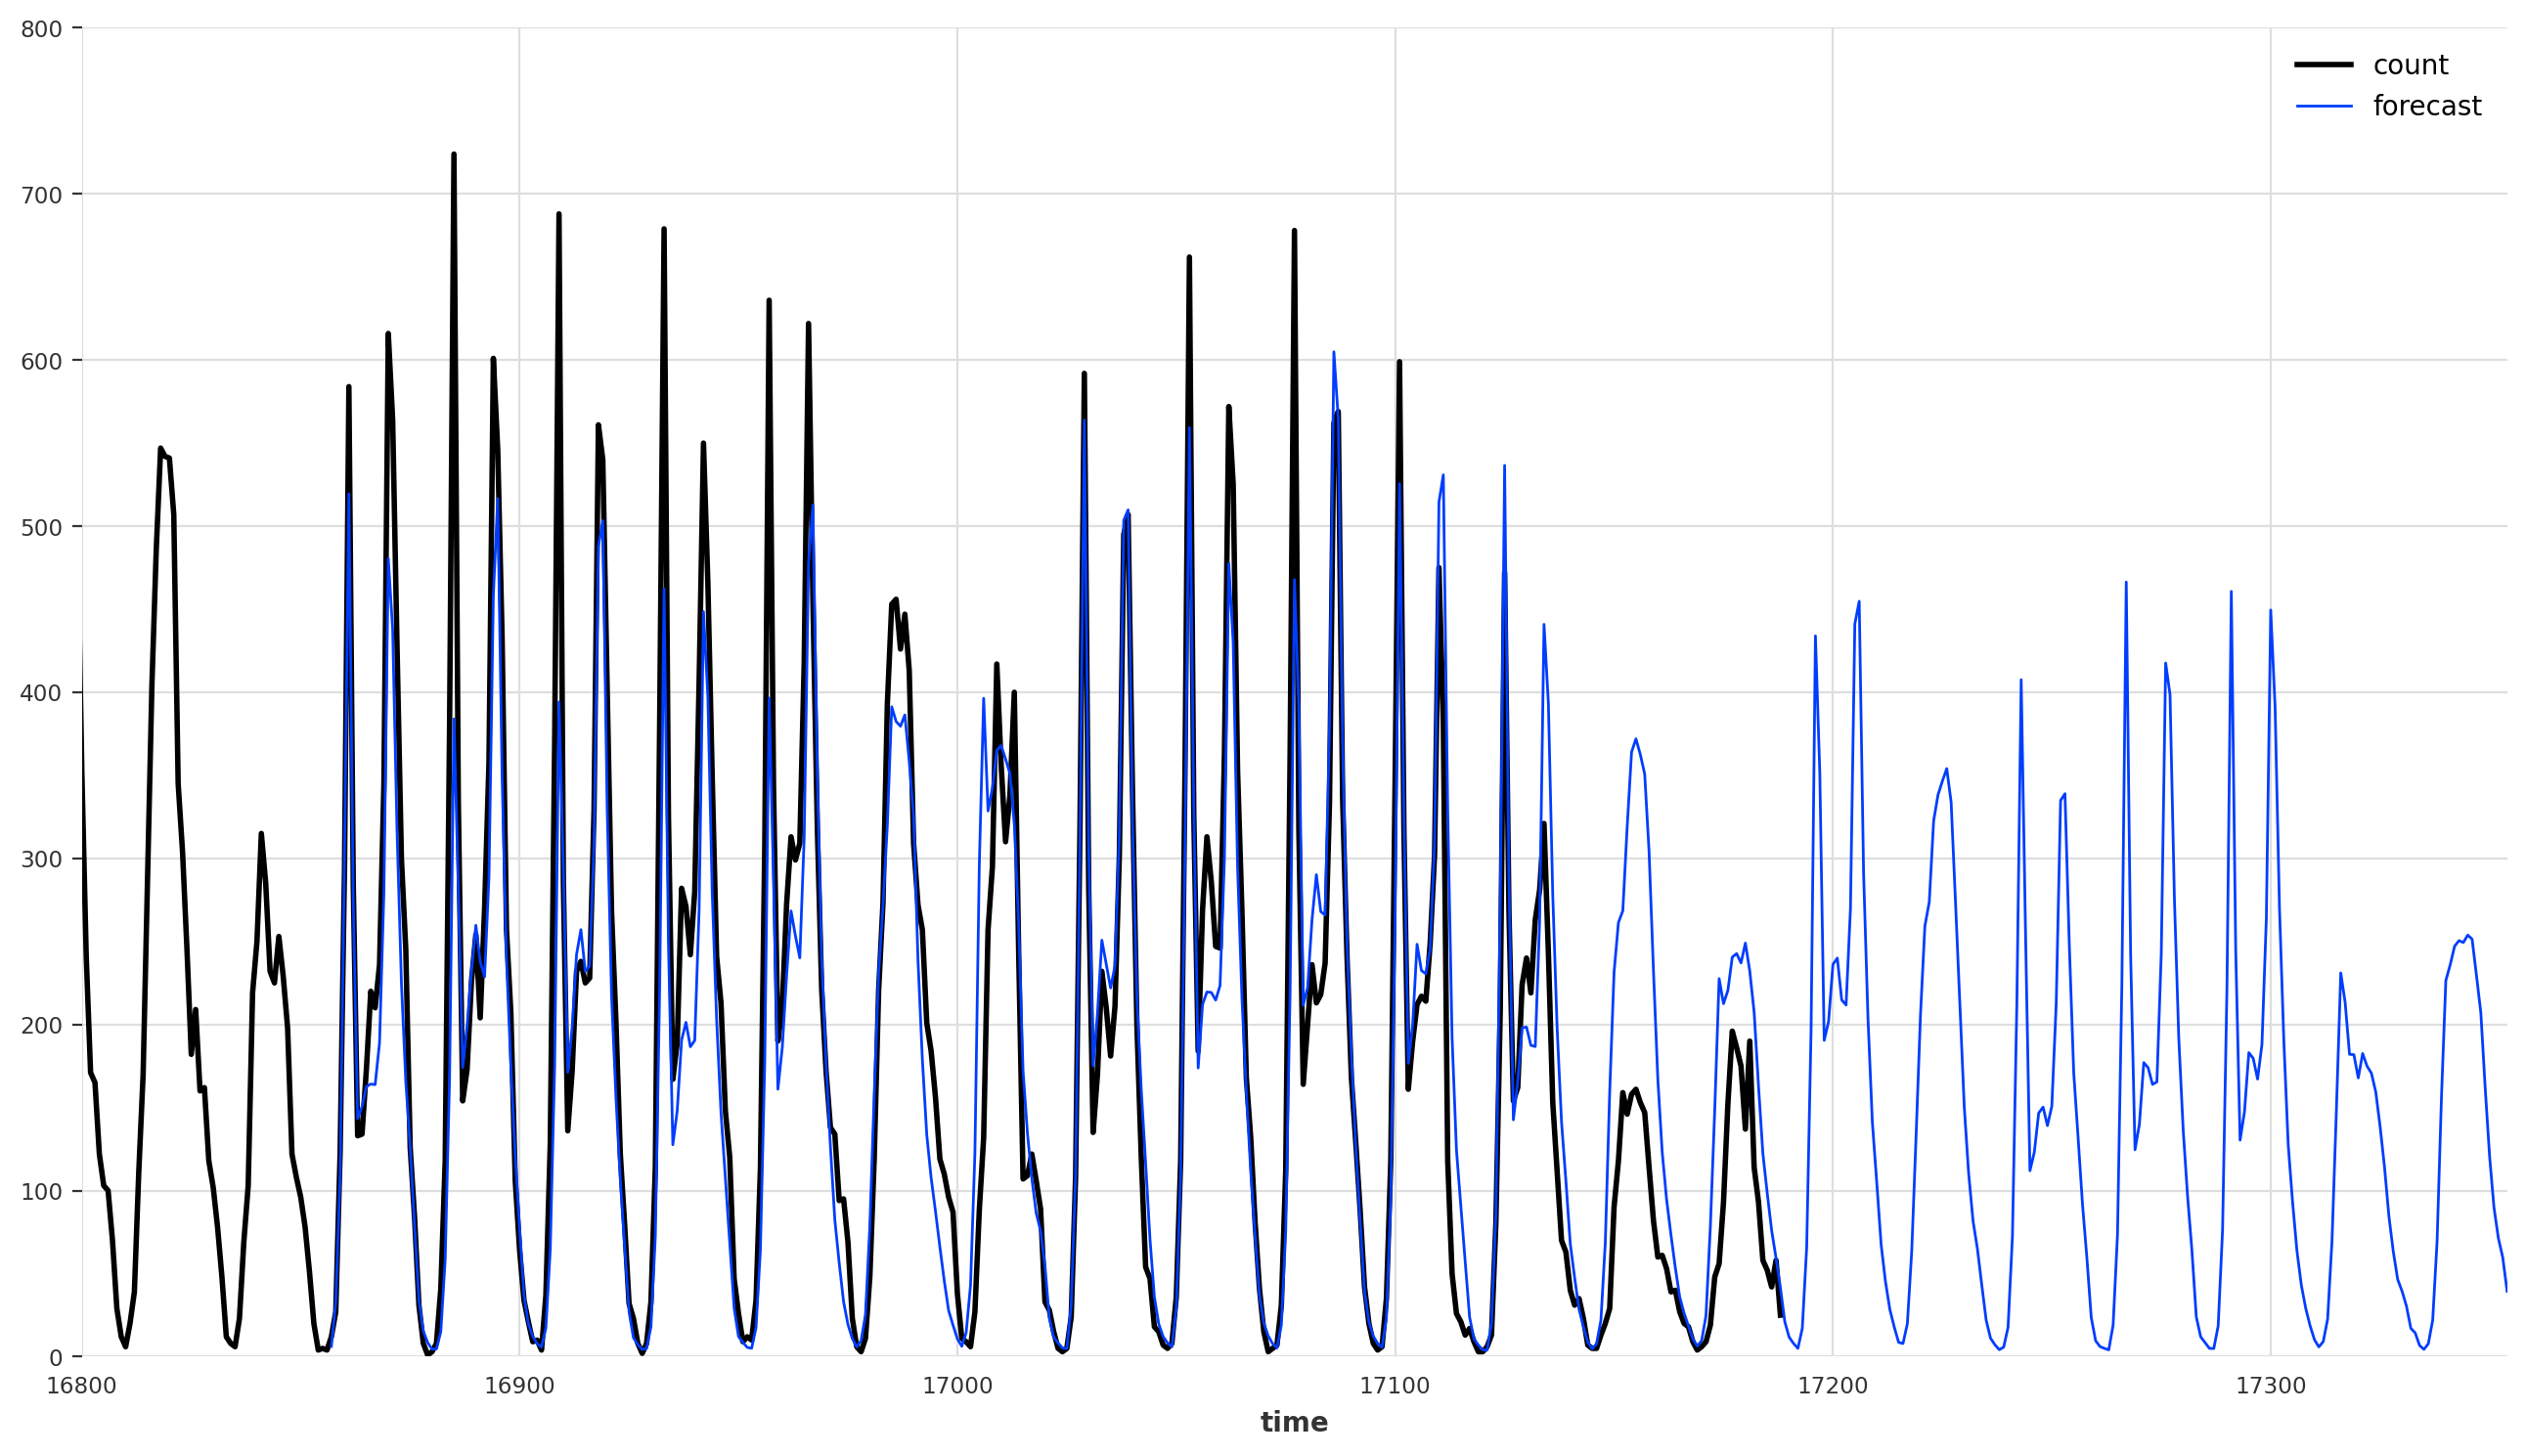

In [52]:
figure(figsize = (16, 9), dpi = 200)
y.plot()
prediction.plot(label='forecast', low_quantile=0.01, high_quantile=0.99, linewidth=1)
plt.xlim([16800, 17354])
plt.ylim([0, 800])
plt.show()
#plt.legend()

In [36]:
#we can see that this is quite good visually, but there are two days where we see some over predictions
#fit model again including the last two weeks of data

In [37]:
y_train = y[:-(166)]
y_test = y[-(166):]
model = RegressionModel(
                        model = lgb.LGBMRegressor(max_depth = 12),
                        lags = [-1,-2,-3,-4,-5,-6,-7],
                        lags_future_covariates =[0]
                        )

In [38]:
model.fit(y_train, future_covariates = future_cov)

C:\Users\docto\anaconda3\lib\site-packages\darts\timeseries.py:4079: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  if isinstance(time_idx, pd.Int64Index) and not isinstance(


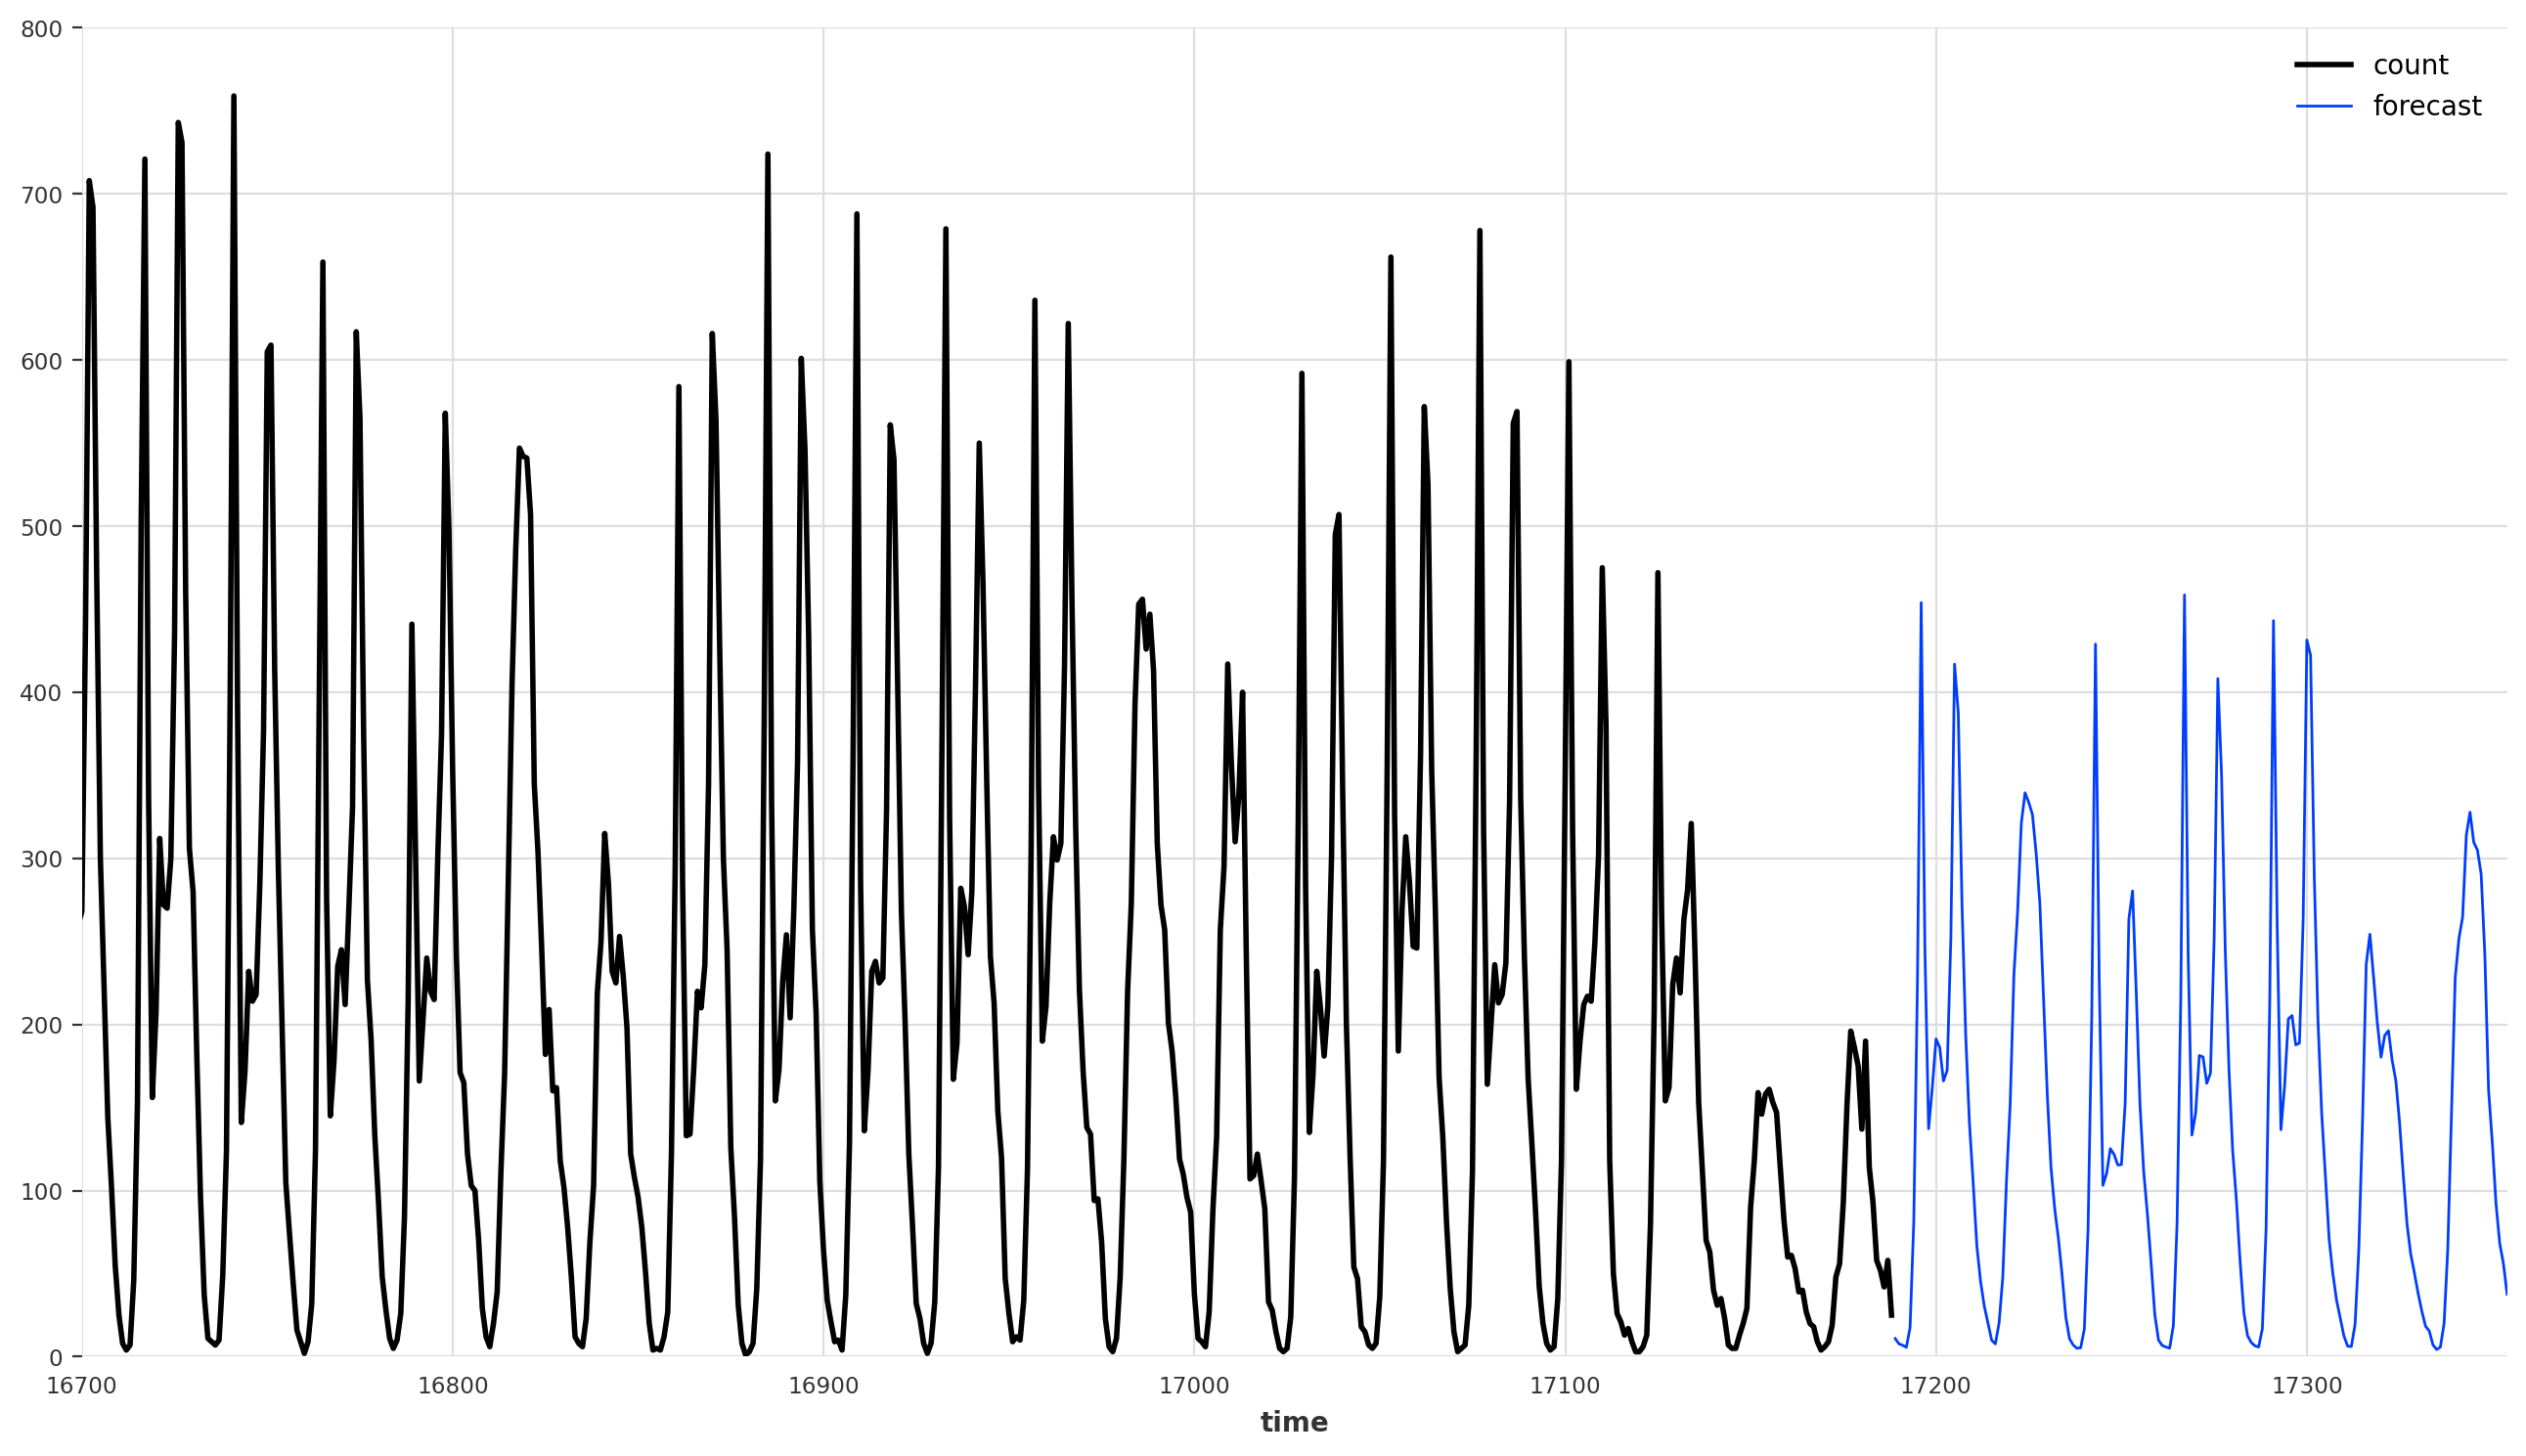

In [39]:
#my final prediction
prediction = model.predict(n = len(y_test))
#print(prediction)
figure(figsize = (16, 9), dpi = 200)
y.plot()
prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95, linewidth=1)
plt.xlim([16700, 17354])
plt.ylim([0, 800])
plt.show()

In [41]:
#due to time constraint, but I would create a simple baseline predictions such as 7 days moving average
#compare time series validation metrics such as MAPE of my final prediction vs this baseline model
#I would usually do more folds of step forward cross validation, but wasn't able to due to time

In [42]:
#Q2

In [43]:
#aggregate data to daily level, sum counts, all other columns are aggregated using mean,
#for some features like temp, it might be useful to construct features like last 7 day average, today highest, lowest etc.
#but I keep it simple here for clarity

In [63]:
daily_data = data.groupby(data["datetime"].dt.date).agg({'count': 'sum',
                                           "season":"mean",
                                            "holiday":"mean",
                                            "workingday":"mean",
                                            "weather":"mean",
                                            "temp":"mean",
                                            "atemp":"mean",
                                            "humidity":"mean",
                                            "windspeed":"mean",
                                            "dayofweek":"mean",
                                            "month":"mean",
                                            "year":"mean"}).reset_index()

In [64]:
daily_data

,datetime,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,dayofweek,month,year
0,2011-01-01,985.0,1.0,0.0,0.0,1.583333,8.175833,8.000000,80.956522,10.750000,5.0,1.0,2011.0
1,2011-01-02,1360.0,1.0,0.0,1.0,2.217391,1.032174,-0.521739,82.956522,3.565217,6.0,1.0,2011.0
2,2011-01-03,1851.0,1.0,0.0,1.0,1.000000,4.533333,1.416667,53.500000,14.500000,0.0,1.0,2011.0
3,2011-01-04,2227.0,2.0,0.0,1.0,1.666667,6.100000,2.708333,68.625000,17.333333,1.0,1.0,2011.0
4,2011-01-05,3351.0,2.0,0.0,0.0,1.666667,13.228333,13.583333,76.208333,7.125000,2.0,1.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2012-12-26,0.0,1.0,0.0,1.0,1.958333,3.436667,-1.458333,82.333333,21.208333,2.0,12.0,2012.0
726,2012-12-27,0.0,1.0,0.0,1.0,1.583333,3.945833,-1.041667,65.291667,23.458333,3.0,12.0,2012.0
727,2012-12-28,0.0,1.0,0.0,1.0,1.708333,3.906667,0.833333,59.000000,10.416667,4.0,12.0,2012.0
728,2012-12-29,0.0,1.0,0.0,0.0,2.041667,3.906667,0.000000,75.291667,8.333333,5.0,12.0,2012.0


In [65]:
daily_data.describe()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,dayofweek,month,year
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,4491.063014,2.227397,0.028767,0.683562,1.434725,15.301084,15.330002,62.790508,12.765541,3.006849,6.512329,2011.500000
std,1966.074748,1.076149,0.167266,0.465405,0.440741,8.595513,10.744981,14.257028,5.195221,2.003072,3.448303,0.500343
min,0.000000,1.000000,0.000000,0.000000,1.000000,-5.220870,-10.782609,0.000000,1.500000,0.000000,1.000000,2011.000000
25%,3169.750000,1.000000,0.000000,0.000000,1.053442,7.891875,6.311594,51.937500,9.041667,1.000000,4.000000,2011.000000
50%,4548.500000,2.000000,0.000000,1.000000,1.291667,15.460833,16.166667,62.708333,12.125000,3.000000,7.000000,2011.500000
75%,5966.000000,3.000000,0.000000,1.000000,1.708333,22.814375,24.187500,73.031250,15.625000,5.000000,9.750000,2012.000000
max,8714.000000,4.000000,1.000000,1.000000,3.166667,32.498333,39.500000,97.250000,34.000000,6.000000,12.000000,2012.000000


In [66]:
#75% percentile is 5966, I define anything bigger than this is high demand
#use rolling data to construct indicator to show wether high demand has occured in the next 7 days

In [67]:
indicator = []
for i in range(len(daily_data.iloc[:-14,:])):
    indicator.append((daily_data["count"][i+1:i+8]>5966).any())

In [68]:
model_data = daily_data.iloc[:-14,:]

In [69]:
model_data["high_demand_indicator"] = list(map(int, indicator))

C:\Users\docto\AppData\Local\Temp\ipykernel_4192\569071847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["high_demand_indicator"] = list(map(int, indicator))


In [70]:
#model_data.tail(20)

In [71]:
X = model_data.drop(["datetime","high_demand_indicator"], axis = 1)
y = model_data["high_demand_indicator"]

In [72]:
#X

In [73]:
#tried sequentially split the data by 80:20, it works badly
#i = int((1 - 0.2) * X.shape[0]) + 1
#X_train, X_test = np.split(X, [i])
#y_train, y_test = np.split(y, [i])

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [75]:
lgb_params = {'objective':'binary',
              'metric':'auc',
              'learning_rate':0.01,
              'is_unbalance': True
                } 

In [76]:
clf = lgb.LGBMClassifier(**lgb_params, max_depth = 6)
clf.fit(X_train, y_train)

LGBMClassifier(is_unbalance=True, learning_rate=0.01, max_depth=6, metric='auc',
               objective='binary')

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score
y_pred_train = clf.predict(X_train)
cm = confusion_matrix(y_pred_train, y_train )
print('Confusion matrix\n\n', cm)
print("precision: {}".format(precision_score(y_pred_train, y_train)))
print("accuracy: {}".format(accuracy_score(y_pred_train, y_train)))
print("f1_socre: {}".format(f1_score(y_pred_train, y_train)))
print("recall: {}".format(recall_score(y_pred_train, y_train)))

Confusion matrix

 [[317  20]
 [  6 229]]
precision: 0.9196787148594378
accuracy: 0.9545454545454546
f1_socre: 0.946280991735537
recall: 0.9744680851063829


In [78]:
y_pred_test = clf.predict(X_test)
cm = confusion_matrix(y_pred_test, y_test )
print('Confusion matrix\n\n', cm)
print("precision: {}".format(precision_score(y_test, y_pred_test)))
print("accuracy: {}".format(accuracy_score(y_test, y_pred_test)))
print("f1_socre: {}".format(f1_score(y_test, y_pred_test)))
print("recall: {}".format(recall_score(y_test, y_pred_test)))

Confusion matrix

 [[88  5]
 [ 4 47]]
precision: 0.9215686274509803
accuracy: 0.9375
f1_socre: 0.9126213592233009
recall: 0.9038461538461539


In [61]:
#we can see that the lightgbm model actually performs well with it's high f1_score in the testing data.
#so for 92% of the time, we are correct in predicting if there will high demand within the next 7 days

In [79]:
#another intuiative way of apporaching this is using the darts forecast we have above
#for a given day, we perform the forecast with n=7*24 steps, aggregate it by daily counts,
#then just check if any of the days are above our 75th percentile of daily counts.
#obviously I also left out areas like model tuning and deeper feature engineering due to time constraint